In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import glob

In [2]:
#!pip install ipympl

In [3]:
%matplotlib widget

## # Descarga del dataset

In [4]:
path = "https://raw.githubusercontent.com/moisesStevend/ecg_datasets/main/cabecera/ecg_agitado_p1.txt"

In [5]:
!wget "https://raw.githubusercontent.com/moisesStevend/ecg_datasets/main/cabecera/ecg_agitado_p1.txt"

--2023-09-22 15:37:18--  https://raw.githubusercontent.com/moisesStevend/ecg_datasets/main/cabecera/ecg_agitado_p1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1100711 (1,0M) [text/plain]
Saving to: ‘ecg_agitado_p1.txt.4’

ecg_agitado_p1.txt. 100%[===================>]   1,05M  --.-KB/s    in 0,1s    

2023-09-22 15:37:18 (10,4 MB/s) - ‘ecg_agitado_p1.txt.4’ saved [1100711/1100711]



## # Lectura de la cabecera

In [6]:
def lectura_cabecer(_path):
    with open(_path) as f:
        lines = f.readlines()[:3]

    for i in lines:
        print(i)

    dict_header = eval(lines[1].replace("#",""))
    
    return dict_header


In [7]:
lc = lectura_cabecer('./ecg_agitado_p1.txt')
lc, lc['98:D3:71:FD:62:1F']["sampling rate"], lc['98:D3:71:FD:62:1F']["resolution"]

# OpenSignals Text File Format. Version 1

# {"98:D3:71:FD:62:1F": {"position": 0, "device": "bitalino_rev", "device name": "98:D3:71:FD:62:1F", "device connection": "BTH98:D3:71:FD:62:1F", "sampling rate": 1000, "resolution": [4, 1, 1, 1, 1, 10], "firmware version": 1282, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2023-4-12", "time": "12:38:5.828", "channels": [2], "sensor": ["ECGBIT"], "label": ["A2"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A2"], "special": [{}], "digital IO": [0, 0, 1, 1]}}

# EndOfHeader



({'98:D3:71:FD:62:1F': {'position': 0,
   'device': 'bitalino_rev',
   'device name': '98:D3:71:FD:62:1F',
   'device connection': 'BTH98:D3:71:FD:62:1F',
   'sampling rate': 1000,
   'resolution': [4, 1, 1, 1, 1, 10],
   'firmware version': 1282,
   'comments': '',
   'keywords': '',
   'mode': 0,
   'sync interval': 2,
   'date': '2023-4-12',
   'time': '12:38:5.828',
   'channels': [2],
   'sensor': ['ECGBIT'],
   'label': ['A2'],
   'column': ['nSeq', 'I1', 'I2', 'O1', 'O2', 'A2'],
   'special': [{}],
   'digital IO': [0, 0, 1, 1]}},
 1000,
 [4, 1, 1, 1, 1, 10])

In [8]:
fs = lc['98:D3:71:FD:62:1F']["sampling rate"]
rs = lc['98:D3:71:FD:62:1F']["resolution"][-1]

print(f"fs={fs}, rs={rs}")

fs=1000, rs=10


## # Lectura de los datos

In [9]:
ecg = np.genfromtxt(path, skip_header=3)[:,-1]
ecg, len(ecg)

(array([729., 744., 750., ..., 535., 533., 532.]), 71550)

Text(0.5, 9.444444444444459, 'segundos (s)')

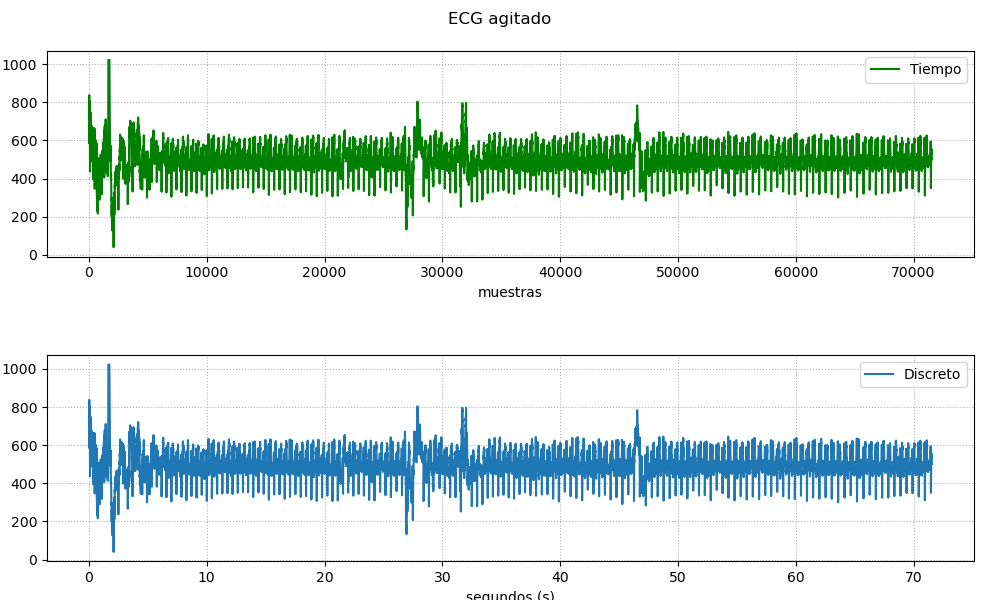

In [10]:
fig, ax = plt.subplots(figsize=(10,6), nrows=2, ncols=1)
plt.tight_layout(h_pad=5)
fig.suptitle("ECG agitado")
plt.tight_layout(h_pad=5)

ax[0].plot(ecg, label="Tiempo", c="green")
#ax[0].set_title("ECG agitado")
ax[0].grid(ls=":")
ax[0].legend()
ax[0].set_xlabel("muestras")

Ts=1/fs
n = len(ecg)
td = np.arange(n)*Ts

ax[1].plot(td, ecg, label="Discreto")
#ax[1].set_title("ECG agitado")
ax[1].grid(ls=":")
ax[1].legend()
ax[1].set_xlabel("segundos (s)")